# 9. Γεωεπεξεργασία διανυσματικών δεδομένων

## Ειδική ενότητα για εκτέλεση στο Google Colab

In [1]:
# έλεγχος αν το notebook τρέχει στο google colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
# αν το notebook τρέχει στο colab, mount το Google Drive και αλλαγή στο directory που έχει γίνει clone το github repository.
# εγκατάσταση απαραίτητων βιβλιοθηκών
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/Colab\ Notebooks/programming/notebooks
    !pip install rasterio geopandas folium matplotlib mapclassify

Ο χώρος και οι γεωμετρικές δομές του μπορούν να αναπαρασταθούν μέσω διανυσματικών δεδομένων (Vector).
Οι τρείς βασικές δομές δεδομένων είναι:
- Τα σημεία
- Οι γραμμές
- Τα πολύγωνα

![alt text](https://raw.githubusercontent.com/kokkytos/programming/main/images/vector.png)

Επιπλέον αυτά τα γεωμετρικά δεδομένα συνοδεύονται και απο περιγραφικά δεδομένα που αφορούν τις ιδιότητες ή τα χαρακτηριστικά αυτών των δεδομένων.

![alt text](https://raw.githubusercontent.com/kokkytos/programming/main/images/spatial-attribute-tables.png)

Στα Σ.Γ.Π. ο πιο συνηθισμένος τύπος αρχείων αποθήκευσης αυτών των δεδομένων είναι το shapefile. 
Πλέον έχουν αναπτυχθεί και άλλοι τύποι όπως geojson, geopackage και χωρικές βάσεις δεδομένων (geodatabases) όπως η Postgresql/Postgis.

Ο προσδιορισμός της γεωγραφικής θέσης στην υδρόγειο γίνεται μέσω ενός ζεύγους γεωγραφικών συντεταγμένων.
Κάθε σημείο στον χώρο προσδιορίζεται γεωγραφικά από το γεωγραφικό μήκος (λ) και το γεωγραφικό πλάτος (φ).


![alt text](https://raw.githubusercontent.com/kokkytos/programming/main/images/coords.jpg)

Για να αποδοθεί η τρισδιάστατη υδρόγειος σφαίρα σε ένα δυσδιάστατο σύστημα αναφορά χρησιμοποιείται ένα προβολικό σύστημα.

![alt text](https://raw.githubusercontent.com/kokkytos/programming/main/images/437-mapping-projection-types.png)


Κάθε προβολικό σύστημα της σφαίρας στο επίπεδο εισάγει μια σειρά παραμορφώσεων που αφορά το σχήμα των γεωμετρικών δομών, την κλίμακα, την έκταση και τις αποστάσεις. Ανάλογα το προβολικό σύστημα κάποιες από τις παραπάνω παραμορφώσεις εμφανίζονται σε μεγάλο βαθμό και άλλες όχι.
Οπότε ανάλογα το είδος της έρευνας ο ερευνητής οφείλει να γνωρίζει τι είδους παραμορφώσεις εισάγει η κάθε προβολή και ανάλογα να επιλέγει την προβολή με τα λιγότερα σφάλματα.

## Python βιβλιοθήκες για διανυσματικά δεδομένα

Για την ανάγνωση, εγγραφή, επεξεργασία διανυσματικών δεδομένων στην Python έχουν καθιερωθεί μια σειρά βιβλιοθηκών.
Η αρχαιότερη και βασική βιβλιοθήκη είναι η [GDAL/OGR](https://gdal.org/). Επειδή η βιβλιοθήκη δεν είναι ιδιαίτερα συμβατή σε σχέση με τον τρόπο συγγραφής της Python και είναι επιρρεπής σε σφάλματα έχουν αναπτυχθεί πιο σύγχρονες βιβλιοθήκες όπως η βιβλιοθήκη [Fiona](https://github.com/Toblerity/Fiona) που είναι ιδιαίτερα χρήσιμη για την ανάγνωση/εγγραφή διανυσματικών δεδομένων και η βιβλιοθήκη [Shapely](https://github.com/shapely/shapely) η οποία χρησιμοποιείται για επεξεργασία και ανάλυση δεδομένων.

## Η βιβλιοθήκη Shapely

### shapely from WKT

Μπορούμε να δημιουργήσουμε αντικείμενα shapely που αναπαριστούν σημεία ή γραμμές ή πολύγωνα μέσω WKT. Η γλώσσα [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) είναι μια ειδική διάλεκτος για την περιγραφή διανυσματικών αντικειμένων. Εισάγουμε τις απαραίτητες υπο-βιβλιοθήκες (`geometry` και `wkt`) από την βιβλιοθήκη shapely. 

In [3]:
import shapely.geometry
import shapely.wkt

#### Πολύγωνα

Καλούμε την μέθοδο `shapely.wkt.loads()` για να δημιουργήσουμε shapely objects από wkt

In [4]:
pol1 = shapely.wkt.loads("POLYGON ((0 0, 0 -1, 7.5 -1, 7.5 0,0 0))")


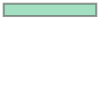

In [5]:
pol1

Η εκτύπωση του shapely αντικειμένου επιστρέφει μία περιγραφή σε μορφή WKT. 

In [6]:
print(pol1)

POLYGON ((0 0, 0 -1, 7.5 -1, 7.5 0, 0 0))


Εκτύπωση του τύπου του αντικειμένου pol1

In [7]:
type(pol1)

shapely.geometry.polygon.Polygon

In [8]:
pol2 = shapely.wkt.loads("POLYGON ((0 1, 1 0, 2 0.5, 3 0, 4 0, 5 0.5, 6 -0.5, 7 -0.5, 7 1, 0 1))")
print(pol2)

POLYGON ((0 1, 1 0, 2 0.5, 3 0, 4 0, 5 0.5, 6 -0.5, 7 -0.5, 7 1, 0 1))


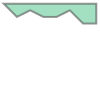

In [9]:
pol2

Δημιουργία MultiPolygon shapely object από αντίστοιχη συλλογή πολυγώνων MULTIPOLYGON

In [10]:
pol3 = shapely.wkt.loads("""
MULTIPOLYGON
(((40 40, 20 45, 45 30, 40 40)),
((20 35, 10 30, 10 10, 30 5, 45 20, 20 35), (30 20, 20 15, 20 25, 30 20)))
""")

In [11]:
type(pol3)

shapely.geometry.multipolygon.MultiPolygon

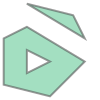

In [12]:
pol3

In [13]:
type(pol3)

shapely.geometry.multipolygon.MultiPolygon

#### Σημεία

In [14]:
pnt1 = shapely.wkt.loads("""
POINT (30 10)
""")

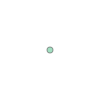

In [15]:
pnt1

Συλλογή σημείων

In [16]:
pnt2 = shapely.wkt.loads("""
MULTIPOINT(0 0,1 1)
""")

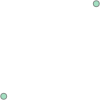

In [17]:
pnt2

#### Γραμμές

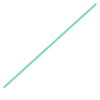

In [18]:
line1 =shapely.wkt.loads("""
LINESTRING(1.5 2.45,3.21 4)
""")

line1

Συλλογή γραμμών

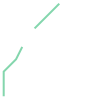

In [19]:
line2 =shapely.wkt.loads("""
MULTILINESTRING((0 0,-1 -2,-3 -4, -3 -8),(2 3,3 4,6 7))
""")

line2



### Shapely μέσω συναρτήσεων  

In [20]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

Κάθε συνάρτηση λαμβάνει διαφορετικά ορίσματα ανάλογα με την συνάρτηση.

Στην συνέχεια ακολουθεί η δημιουργία ενός αντικειμένου shapely γεωμετρίας σημείου.

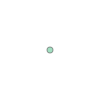

In [21]:
pnt1 = shapely.geometry.Point((2, 0.5))
pnt1

Για την δημιουργία συλλογής σημείων `multipoint` δίνουμε σαν όρισμα στην συνάρτηση *[shapely.geometry.MultiPoint](https://shapely.readthedocs.io/en/stable/manual.html#collections-of-points)* μία λίστα από πλειάδες (tuples). Η κάθε πλειάδα `(x,y)`αντιστοιχεί στις συντεταγμένες ενός σημείου.

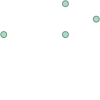

In [22]:
coords = [(2, 0.5), (1, 1), (-1, 0), (1, 0)]
pnt2 = shapely.geometry.MultiPoint(coords)
pnt2

Για την δημιουργία γραμμών χρησιμοποιείται πάλι μία λίστα από tuples που περιγράφουν τις κορυφές της γραμμής. Στο παρακάτω παράδειγμα χρησιμοποιούμαι την προηγούμενη πλειάδα αλλά πλέον χρησιμοποιούμε την μέθοδο *shapely.geometry.LineString* για την δημιουργία γραμμής και όχι την μέθοδο `shapely.geometry.MultiPoint` που δημιουργεί συλλογές σημείων.

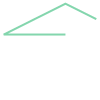

In [23]:
line1 = shapely.geometry.LineString(coords)
line1

Κατασκεύη γραμμής από Point Objects:

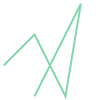

In [24]:
p1 = shapely.wkt.loads("POINT (0 0)")
p2 = shapely.wkt.loads("POINT (1 1)")
p3 = shapely.wkt.loads("POINT (2 -1)")
p4 = shapely.wkt.loads("POINT (2.5 2)")
p5 = shapely.wkt.loads("POINT (1 -1)")

shapely.geometry.LineString([p1, p2, p3, p4, p5])

Αντίστοιχα μπορούμε να δημιουργήσουμε συλλογές γραμμών. 

Δημιουργούμε ξεχωριστά αντικείμενα γραμμών shapely και στην συνέχεια καλούμε την συνάρτηση `shapely.geometry.MultiLineString` όπου ορίζουμε σαν όρισμα μια λίστα με τις μεμονωμένες γραμμές.

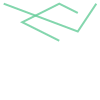

In [25]:
l1 = shapely.geometry.LineString([(2, 0.5), (1, 1), (-1, 0), (1, -1)])
l2 = shapely.geometry.LineString([(-2, 1), (2, -0.5), (3, 1)])
line2 = shapely.geometry.MultiLineString([l1, l2])
line2

Αντίστοιχα δημιουργούμε πολυγωνικά αντικείμενα  μέσω μια λίστας με πλειάδες σημείων που χρησιμοποιείται σαν όρισμα στην συνάρτηση *shapely.geometry.Polygon*

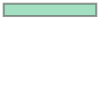

In [26]:
coords = [(0, 0), (0, -1), (7.5, -1), [7.5, 0], (0, 0)]
shapely.geometry.Polygon(coords)


Αν θέλουμε μπορούμε να περάσουμε μία δεύτερη λίστα η οποία περιλαμβανει επιμέρους λίστες με πλειάδες σημείων τα οποία περιγράφουν τρύπες μέσα στο πολύγωνο.

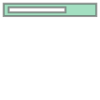

In [27]:
coords_exterior = [(0, 0), (0, -1), (7.5, -1), (7.5, 0), (0, 0)]
coords_interiors = [[(0.4, -0.3), (5, -0.3), (5, -0.7), (0.4, -0.7), (0.4, -0.7)]]
shapely.geometry.Polygon(coords_exterior, coords_interiors)

Με την συνάρτηση *shapely.geometry.MultiPolygon* δημιουργούμε αντίστοιχα συλλογές πολυγώνων από μεμονωμένα αντικείμενα shapely.geometry.polygon.Polygon

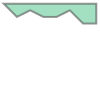

In [28]:
pol2

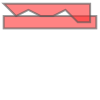

In [29]:
multipolygon1 = shapely.geometry.MultiPolygon([pol1, pol2])
multipolygon1


In [30]:
print(multipolygon1)

MULTIPOLYGON (((0 0, 0 -1, 7.5 -1, 7.5 0, 0 0)), ((0 1, 1 0, 2 0.5, 3 0, 4 0, 5 0.5, 6 -0.5, 7 -0.5, 7 1, 0 1)))


Σύμφωνα με τις προδιαγραφές [simple features](https://en.wikipedia.org/wiki/Simple_Features) το παραπάνω object δεν είναι έγκυρο γιατί ένα πολύγωνο τέμνει ένα άλλο σε άπειρο αριθμό σημείων. Μπορούμε να ελέγξουμε την εγκυρότητα ενός αντικειμένου με την κλήση τις ιδιότητας *is_valid*. Επίσης κατά την οπτικοποίηση στο προηγούμενο βήμα του αντικειμένου multipolygon1 αυτό εμφανίζεται με κόκκινο (αντί για πράσινο). Ένδειξη ότι δεν ειναι valid.

In [31]:
multipolygon1.is_valid

False

Ταυτόχρονα μπορούμε να φτιάξουμε σύνθετες συλλογές από επιμέρους αντικείμενα shapely.

In [32]:
geo_collection = shapely.geometry.GeometryCollection([multipolygon1,line2,pnt1])

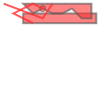

In [33]:
geo_collection

### Shapely μέσω shape


Μπορούμε να δημιουργήσουμε αντικείμενα shapely μέσω της συνάρτησης *shapely.geometry.shape* η οποία δέχεται σαν όρισμα ένα λεξικό μορφής [GEOJSON](https://en.wikipedia.org/wiki/GeoJSON) το οποίο πρέπει να έχει τις εξής δύο ιδιότητες.

* Την ιδιότητα `"type"` που περιγράφει τον τύπο γεωμετρίας
* Την ιδιότητα  `"coordinates"` που περιγράφει τις γεωμετρίες και τις συντεταγμένες τους σαν λίστες ή πλειάδες.

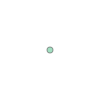

In [34]:
d = {"type": "Point", "coordinates": (0, 1)}
shapely.geometry.shape(d)

Δημιουργία αντικειμένου MultiPolygon μέσω GEOJSON λεξικού:

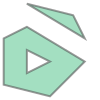

In [35]:
d = {
  "type": "MultiPolygon",
  "coordinates": [
    [
      [[40, 40], [20, 45], [45, 30], [40, 40]]
    ],
    [
      [[20, 35], [10, 30], [10, 10], [30, 5], [45, 20], 
      [20, 35]], 
      [[30, 20], [20, 15], [20, 25], [30, 20]]
    ]
  ]
}
pol3 = shapely.geometry.shape(d)
pol3

## Γεωμετρικός τύπος δεδομένων

H ιδιότητα `.geom_type` ενός αντικειμένου shapely περιγράφει τον γεωμετρικό τύπο της:

In [36]:
pol1.geom_type

'Polygon'

In [37]:
line1.geom_type

'LineString'

In [38]:
geo_collection.geom_type

'GeometryCollection'

## Συντεταγμένες

Για να ανακτήσουμε τις συντεταγμένες ενός shapely αντικειμένου καλούμε με διαφορετικό τρόπο τις ανάλογες συναρτήσεις ανάλογα την πολυπλοκότητα του κάθε τύπου.

Για ένα Point object καλούμε άμεσα την ιδιότητα coords η οποία επιστρέφει ένα *shapely.coords.CoordinateSequence* object.

In [39]:
pnt1.coords

Μπορούμε να λάβουμε ως λίστα τις πλειάδες συντεταγμένων που το απαρτίζουν

In [40]:
list(pnt1.coords)

[(2.0, 0.5)]

Αντίστοιχα για γραμμή

In [41]:
list(line1.coords)

[(2.0, 0.5), (1.0, 1.0), (-1.0, 0.0), (1.0, 0.0)]

Για να ελέγξουμε σε ένα αντικείμενο συλλογών γεωμετρίας (MultiPoint, MultiPolygon κτλ) πόσες επιμέρους γεωμετρίες περιλαμβάνει:

In [42]:
len(line2.geoms)

2

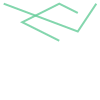

In [43]:
line2

Για να λάβουμε το πρώτο αντικείμενο γεωμετρίας:

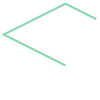

In [44]:
line2.geoms[0]

In [45]:
type(line2.geoms[0])


shapely.geometry.linestring.LineString

In [46]:
line2.geoms[0].geom_type

'LineString'

Και λαμβάνουμε τις συντεταγμένες της πρώτης γεωμετρίας:

In [47]:
list(line2.geoms[0].coords)

[(2.0, 0.5), (1.0, 1.0), (-1.0, 0.0), (1.0, -1.0)]

ή της δεύτερης

In [48]:
list(line2.geoms[1].coords)

[(-2.0, 1.0), (2.0, -0.5), (3.0, 1.0)]

Για τα πολύγωνα ακολουθούμε διαφορετική προσέγγιση. Ένα πολύγωνο αποτελεί από το εξωτερικό περίγραμμα (exterior) ή και ένα ή περισσότερα περιγράμματα εσωτερικών οπών (interiors). Κατά συνέπεια έχουμε συντεταγμένες που περιγράφουν το κάθε περίγραμμα.

Το εξωτερικό περίγραμμα του pol1 αντικειμένου:

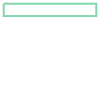

In [49]:
pol1.exterior

Και οι συντεταγμένες του:

In [50]:
list(pol1.exterior.coords)

[(0.0, 0.0), (0.0, -1.0), (7.5, -1.0), (7.5, 0.0), (0.0, 0.0)]

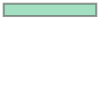

In [51]:
pol1

Το pol1 όμως δεν έχει εσωτερικές τρύπες γι αυτό και το παρακάτω επιστρέφει μηδέν.

In [52]:

len(pol1.interiors)

0

Έστω το παρακάτω MultiPolygon object που δημιουργήσαμε σε προηγούμενο στάδιο.

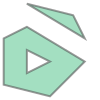

In [53]:
pol3

Περιλαμβάνει δύο ξεχωριστά γεωμετρικά αντικείμενα:

In [54]:
len(pol3.geoms)

2

Ας πάρουμε το πρώτο:

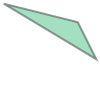

In [55]:
pol3.geoms[0]

Δεν περιλαμβάνει καμία τρύπα στο εσωτερικό του. Ας πάρουμε τις συντεταγμένες από το περίγραμμά του (exterior)

In [56]:
pol3.geoms[0].exterior.coords

Και ας τις επιστρέψουμε σαν λίστα πλειάδων από ζεύγη της μορφής `(x,y)`

In [57]:
list(pol3.geoms[0].exterior.coords)

[(40.0, 40.0), (20.0, 45.0), (45.0, 30.0), (40.0, 40.0)]

Ας δοκιμάσουμε το δεύτερο αντικείμενο γεωμετρίας. Ας το δούμε:

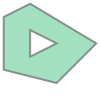

In [58]:
pol3.geoms[1]

Λαμβάνουμε τις συντεταγμένες του εξωτερικού περιγράμματος:

In [59]:
list(pol3.geoms[1].exterior.coords)

[(20.0, 35.0),
 (10.0, 30.0),
 (10.0, 10.0),
 (30.0, 5.0),
 (45.0, 20.0),
 (20.0, 35.0)]

Ας δούμε πόσες τρύπες έχει στο εσωτερικό του:

In [60]:
len(pol3.geoms[1].interiors)

1

Παίρνουμε το περίγραμμα της τρύπας

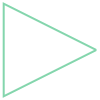

In [61]:
pol3.geoms[1].interiors[0]

Και τις συντεταγμένες της

In [62]:
list(pol3.geoms[1].interiors[0].coords)

[(30.0, 20.0), (20.0, 15.0), (20.0, 25.0), (30.0, 20.0)]

### Ιδιότητες αντικειμένων

#### Υπολογισμός ορίων (bounds)

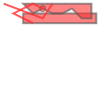

In [63]:
geo_collection

In [64]:
geo_collection.bounds

(-2.0, -1.0, 7.5, 1.0)

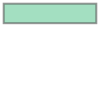

In [65]:
shapely.geometry.box(*geo_collection.bounds)

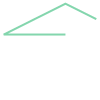

In [66]:
line1

In [67]:
line1.bounds

(-1.0, 0.0, 2.0, 1.0)

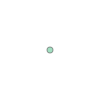

In [68]:
pnt1

In [69]:
pnt1.bounds

(2.0, 0.5, 2.0, 0.5)

In [70]:
list(pnt1.coords)

[(2.0, 0.5)]

#### Υπολογισμός μήκους γραμμής

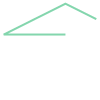

In [71]:
line1

In [72]:
line1.length

5.354101966249685

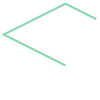

In [73]:
line2.geoms[0]

In [74]:
line2.geoms[0].length

5.5901699437494745

#### Υπολογισμός εμβαδού

In [75]:
pol1.area

7.5

In [76]:
pol2.area

6.25

### Νέες γεωμετρίες

#### Κεντροειδές πολυγώνου (centroid)

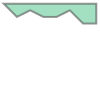

In [77]:
pol2

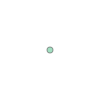

In [78]:
pol2.centroid

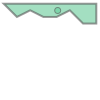

In [79]:
shapely.geometry.GeometryCollection([pol2, pol2.centroid])

#### Περιμετρική ζώνη (buffer)

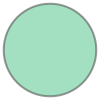

In [80]:
pnt1.buffer(5)

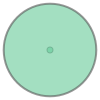

In [81]:
shapely.geometry.GeometryCollection([pnt1,pnt1.buffer(5)])

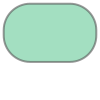

In [82]:
pol1.buffer(5)


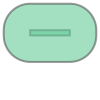

In [83]:
shapely.geometry.GeometryCollection([pol1,pol1.buffer(5)])

#### Convex hull

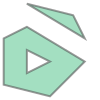

In [84]:
pol3

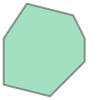

In [85]:
pol3.convex_hull

## Σχέσεις μεταξύ αντικειμένων

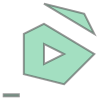

In [86]:
shapely.geometry.GeometryCollection([pol1,pol3])

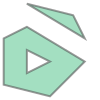

In [87]:
pol3

In [88]:
pol1.intersects(pol3)

False

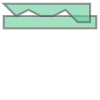

In [89]:
shapely.geometry.GeometryCollection([pol1,pol2])

In [90]:
pol1.intersects(pol2)

True

## Γεωμετρικές πράξεις

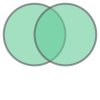

In [91]:
x = shapely.geometry.Point((0, 0)).buffer(1)
y = shapely.geometry.Point((1, 0)).buffer(1)
shapely.geometry.GeometryCollection([x, y])

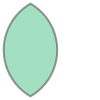

In [92]:
x.intersection(y)

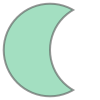

In [93]:
x.difference(y)

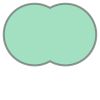

In [94]:
x.union(y)

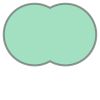

In [95]:
x.union(y)

Υπολογισμός απόστασης ανάμεσα σε δύο αντικείμενα

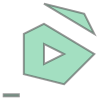

In [96]:
shapely.geometry.GeometryCollection([pol1, pol3])

In [97]:
pol1.distance(pol3)

10.307764064044152

In [98]:
pol3.distance(pol1) 

10.307764064044152

Μετασχηματισμός προβολικού συστήματος:

In [99]:
import pyproj

from shapely.geometry import Point
from shapely.ops import transform

wgs84_pt = Point(39.35858398397631, 22.932070043920394)

wgs84 = pyproj.CRS('EPSG:4326')
greek_grid = pyproj.CRS('EPSG:2100')

project = pyproj.Transformer.from_crs(wgs84, greek_grid, always_xy=True).transform
projected_point = transform(project, wgs84_pt)

In [100]:
print(projected_point)

POINT (2087909.8290560723 2620022.621513317)


In [101]:
list(wgs84_pt.coords)[0]

(39.35858398397631, 22.932070043920394)

Προβολή δεδομένων σε διαδραστικό χάρτη leaflet μέσω της βιβλιοθήκης folium

In [102]:
import folium

coords = list(wgs84_pt.coords)[0]

#Create the map
my_map = folium.Map(location = coords, zoom_start = 13)

# Add marker
folium.Marker(coords, popup = 'Volos').add_to(my_map)

#Display the map
my_map



## Η βιβλιοθήκη Geopandas

Μέχρι τώρα είδαμε πως μπορούμε να διαχειριζόμαστε γεωμετρικά δεδομένα με την βιβλιοθήκη shapely.

Όμως τα γεωγραφικά δεδομένα δεν περιλαμβάνουν μόνο της γεωγραφική πληροφορία και την γεωμετρική τους δομή αλλά συνοδεύονται από μια σειρά περιγραφικών δεδομένων.

Η βιβλιοθήκη [geopandas](https://geopandas.org/) είναι μια βιβλιοθήκη της Python η οποία υποστηρίζει την ανάγνωση, επεξεργασία, ανάλυση και εγγραφή γεωγραφικών και παράλληλα περιγραφικών δεδομένων. Αποτελεί επέκταση της βιβλιοθήκης [pandas](https://pandas.pydata.org/) και "κληρονομεί" τα χαρακτηριστικά και τις δυνατότητές της.

Στην υφιστάμενη δομή της pandas, η geopandas υποστηρίζει την γεωμετρία με την προσθήκη μιας νέας στήλης και το γεωγραφικό σύστημα αναφοράς.

![alt text](pandas-data-structure.svg)

![alt text](../images/dataframe.svg)

Εισάγουμε την βιβλιοθήκη με τον παρακάτω τρόπο

In [103]:
import geopandas as gpd


Για να διαβάσουμε ένα αρχείο shapefile χρησιμοποιούμε την συνάρτηση `gpd.read_file`. Το αντικείμενο που προκύπτει είναι τύπου *geopandas.geodataframe.GeoDataFrame*

In [104]:
# Import shapefile using geopandas
dhmoi = gpd.read_file("../docs/dhmoi.gpkg")

type(dhmoi)

geopandas.geodataframe.GeoDataFrame

Η στήλη της γεωμετρίας ονομάζεται προκαθορισμένα geometry και είναι αντικείμενο *geopandas.geoseries.GeoSeries* που περιλαμβάνει αντικείμενα shapely.

In [105]:
type(dhmoi["geometry"])

geopandas.geoseries.GeoSeries

Με την μέθοδο *geom_type* μπορούμε να δούμε τον γεωμετρικό τύπο κάθε εγγραφής.

In [106]:
dhmoi.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
320    MultiPolygon
321    MultiPolygon
322    MultiPolygon
323    MultiPolygon
324    MultiPolygon
Length: 325, dtype: object

Ας δούμε τις αρχικές εγγραφές του αρχείου

In [107]:
dhmoi.head()

,OBJECTID,X,Y,Name,CodeELSTAT,PopM01,PopF01,PopTot01,UnemrM01,UnemrF01,UnemrT01,PrSect01,Foreig01,Income01,Perif,geometry
0,1,616259.007833,4.551127e+06,KOMOTINIS,0101,29967.0,31534.0,61501.0,4.726948,6.051873,5.221281,21.817852,1.996780,10969.315256,1,"MULTIPOLYGON (((631058.735 4574912.809, 631431..."
1,2,644783.135624,4.561364e+06,ARRIANON,0102,8952.0,9307.0,18259.0,1.955813,2.390181,2.154240,92.912436,0.038337,6398.641486,1,"MULTIPOLYGON (((661976.597 4554253.076, 662118..."
2,3,602100.950461,4.555689e+06,IASMOU,0103,7290.0,7561.0,14851.0,5.653884,6.671554,6.062390,70.206767,1.339977,6608.897469,1,"MULTIPOLYGON (((603623.489 4566376.502, 603657..."
3,4,633712.468442,4.539548e+06,MARONEIAS - SAPON,0104,8284.0,8342.0,16626.0,5.840957,10.270499,7.421934,57.748085,0.890172,6700.375345,1,"MULTIPOLYGON (((650998.525 4557469.860, 651446..."
4,5,517831.195188,4.572544e+06,DRAMAS,0201,28041.0,29326.0,57367.0,8.831689,14.176926,10.851115,7.298838,2.961633,11299.106498,2,"MULTIPOLYGON (((521986.700 4601855.354, 522271..."


<AxesSubplot:>

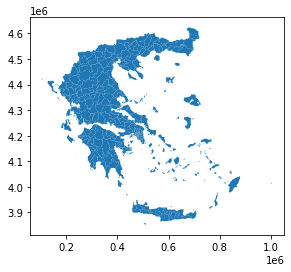

In [108]:
dhmoi.plot()

Χαρτογραφική απόδοση σε διαδραστικό χάρτη

In [109]:
dhmoi.explore(legend=False)

ImportError: The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge folium matplotlib mapclassify' or 'pip install folium matplotlib mapclassify'.

Εκτύπωση λεπτομερειών για το γεωγραφικό σύστημα αναφοράς το οποίο όπως φαίνεται παρακάτω είναι το ΕΓΣΑ '87 (EPSG:2100)

In [121]:
dhmoi.crs

<Derived Projected CRS: PROJCS["unknown",GEOGCS["unknown",DATUM["Greek_Geo ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Greek Geodetic Reference System 1987
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Μπορούμε να μετασχηματίσουμε τα δεδομένα σε ένα διαφορετικό προβολικό σύστημα με κλήση της μεθόδου *to_crs*

In [122]:
dhmoi_wgs84 = dhmoi.to_crs(4326)
dhmoi_wgs84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [123]:
dhmoi.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
320    MultiPolygon
321    MultiPolygon
322    MultiPolygon
323    MultiPolygon
324    MultiPolygon
Length: 325, dtype: object

Εκτύπωση των γεωγραφικών ορίων του αρχείου oikismoi που είναι στο σύστημα αναφορά ΕΓΣΑ '87.

In [124]:
dhmoi.total_bounds

array([ 104040.7266, 3850938.    , 1007943.    , 4624010.2508])

Εκτύπωση των γεωγραφικών ορίων του αρχείου oikismoi που είναι στο σύστημα αναφορά WGS'84.

In [125]:
dhmoi_wgs84.total_bounds

array([19.37377196, 34.80060523, 29.64123782, 41.74911332])

Η μέθοδος *shape* μας επιστρέφει τον πλήθος των γραμμών (325) και των στηλών (15).

In [126]:
dhmoi.shape

(325, 16)

Μπορούμε να εγγράψουμε ένα Geopandas Dataframe 

In [127]:
dhmoi.to_file("dhmoi.geojson", driver="GeoJSON")


/home/leonidas/anaconda3/envs/book/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [128]:
dhmoi.sort_values(by='PopTot01', ascending=False)

,OBJECTID,X,Y,Name,CodeELSTAT,PopM01,PopF01,PopTot01,UnemrM01,UnemrF01,UnemrT01,PrSect01,Foreig01,Income01,Perif,geometry
192,193,476676.870086,4.204338e+06,ATHINAION,4501,374900.0,414266.0,789166.0,4.890244,6.640842,5.624998,0.515649,17.426785,14497.393539,45,"MULTIPOLYGON (((478164.675 4208572.203, 478015..."
22,23,411331.939920,4.497210e+06,THESSALONIKIS,0701,185771.0,211385.0,397156.0,5.402357,7.615427,6.336333,0.834415,7.200951,13388.724605,7,"MULTIPOLYGON (((408112.992 4500238.217, 408264..."
147,148,306893.782874,4.231792e+06,PATREON,3701,104429.0,106065.0,210494.0,7.613916,9.985632,8.493895,2.567481,5.301864,12699.732926,37,"MULTIPOLYGON (((312258.406 4245213.000, 312382..."
245,246,468574.034133,4.199691e+06,PEIRAIOS,5101,87362.0,94571.0,181933.0,5.742561,7.683770,6.480184,0.491722,8.515141,13526.486840,51,"MULTIPOLYGON (((469779.406 4198249.000, 469760..."
301,302,599279.522964,3.900401e+06,IRAKLEIOU,7101,81067.0,82048.0,163115.0,5.047587,8.832661,6.557167,7.477305,4.048727,12479.911946,71,"MULTIPOLYGON (((602945.188 3911414.000, 602942..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,824000.991323,4.016217e+06,CHALKIS,6905,165.0,130.0,295.0,1.265823,4.166667,1.941748,31.683168,17.966102,8888.138597,69,"MULTIPOLYGON (((830115.688 4011995.000, 830198..."
270,271,659987.832319,4.025277e+06,ANAFIS,6002,135.0,137.0,272.0,1.369863,2.941176,1.869159,43.809524,1.102941,9062.404166,60,"MULTIPOLYGON (((669453.375 4014893.000, 669444..."
272,273,599675.697252,4.059438e+06,SIKINOU,6004,118.0,120.0,238.0,0.000000,4.545455,1.333333,27.027027,1.680672,7566.666874,60,"MULTIPOLYGON (((593612.000 4054459.000, 593596..."
275,276,762387.857032,4.149989e+06,AGATHONISIOU,6102,92.0,60.0,152.0,12.765957,10.000000,12.280702,56.000000,9.210526,5421.733909,61,"MULTIPOLYGON (((763781.625 4146430.000, 763859..."


Ορισμός του index στην στήλη *"CodeELSTAT"*

In [129]:
dhmoi = dhmoi.set_index("CodeELSTAT")

In [130]:
dhmoi

,OBJECTID,X,Y,Name,PopM01,PopF01,PopTot01,UnemrM01,UnemrF01,UnemrT01,PrSect01,Foreig01,Income01,Perif,geometry
CodeELSTAT,,,,,,,,,,,,,,,
0101,1,616259.007833,4.551127e+06,KOMOTINIS,29967.0,31534.0,61501.0,4.726948,6.051873,5.221281,21.817852,1.996780,10969.315256,1,"MULTIPOLYGON (((631058.735 4574912.809, 631431..."
0102,2,644783.135624,4.561364e+06,ARRIANON,8952.0,9307.0,18259.0,1.955813,2.390181,2.154240,92.912436,0.038337,6398.641486,1,"MULTIPOLYGON (((661976.597 4554253.076, 662118..."
0103,3,602100.950461,4.555689e+06,IASMOU,7290.0,7561.0,14851.0,5.653884,6.671554,6.062390,70.206767,1.339977,6608.897469,1,"MULTIPOLYGON (((603623.489 4566376.502, 603657..."
0104,4,633712.468442,4.539548e+06,MARONEIAS - SAPON,8284.0,8342.0,16626.0,5.840957,10.270499,7.421934,57.748085,0.890172,6700.375345,1,"MULTIPOLYGON (((650998.525 4557469.860, 651446..."
0201,5,517831.195188,4.572544e+06,DRAMAS,28041.0,29326.0,57367.0,8.831689,14.176926,10.851115,7.298838,2.961633,11299.106498,2,"MULTIPOLYGON (((521986.700 4601855.354, 522271..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,321,507562.964610,3.855768e+06,GAVDOU,49.0,32.0,81.0,0.000000,0.000000,0.350000,51.351351,9.876543,8498.080328,74,"MULTIPOLYGON (((505925.688 3858625.000, 506062..."
7404,322,475420.582085,3.905918e+06,KANTANOU - SELINOU,3271.0,3031.0,6302.0,2.312500,2.234637,2.284569,61.525841,14.680209,7989.958401,74,"MULTIPOLYGON (((469969.812 3897335.000, 469955..."
7405,323,465887.990746,3.920087e+06,KISSAMOU,5925.0,5545.0,11470.0,4.847458,5.894591,5.191257,45.701249,7.916303,8750.030129,74,"MULTIPOLYGON (((457703.500 3902963.000, 457852..."


Υπολογισμός έκτασης (σε $km^2$) σε μία νέα στήλη με το όνομα area

In [131]:
dhmoi["area"] = dhmoi.area*10e-6

In [132]:
dhmoi

,OBJECTID,X,Y,Name,PopM01,PopF01,PopTot01,UnemrM01,UnemrF01,UnemrT01,PrSect01,Foreig01,Income01,Perif,geometry,area
CodeELSTAT,,,,,,,,,,,,,,,,
0101,1,616259.007833,4.551127e+06,KOMOTINIS,29967.0,31534.0,61501.0,4.726948,6.051873,5.221281,21.817852,1.996780,10969.315256,1,"MULTIPOLYGON (((631058.735 4574912.809, 631431...",6470.182562
0102,2,644783.135624,4.561364e+06,ARRIANON,8952.0,9307.0,18259.0,1.955813,2.390181,2.154240,92.912436,0.038337,6398.641486,1,"MULTIPOLYGON (((661976.597 4554253.076, 662118...",7724.393191
0103,3,602100.950461,4.555689e+06,IASMOU,7290.0,7561.0,14851.0,5.653884,6.671554,6.062390,70.206767,1.339977,6608.897469,1,"MULTIPOLYGON (((603623.489 4566376.502, 603657...",4870.493148
0104,4,633712.468442,4.539548e+06,MARONEIAS - SAPON,8284.0,8342.0,16626.0,5.840957,10.270499,7.421934,57.748085,0.890172,6700.375345,1,"MULTIPOLYGON (((650998.525 4557469.860, 651446...",6441.606153
0201,5,517831.195188,4.572544e+06,DRAMAS,28041.0,29326.0,57367.0,8.831689,14.176926,10.851115,7.298838,2.961633,11299.106498,2,"MULTIPOLYGON (((521986.700 4601855.354, 522271...",8401.321201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,321,507562.964610,3.855768e+06,GAVDOU,49.0,32.0,81.0,0.000000,0.000000,0.350000,51.351351,9.876543,8498.080328,74,"MULTIPOLYGON (((505925.688 3858625.000, 506062...",343.773091
7404,322,475420.582085,3.905918e+06,KANTANOU - SELINOU,3271.0,3031.0,6302.0,2.312500,2.234637,2.284569,61.525841,14.680209,7989.958401,74,"MULTIPOLYGON (((469969.812 3897335.000, 469955...",3746.368061
7405,323,465887.990746,3.920087e+06,KISSAMOU,5925.0,5545.0,11470.0,4.847458,5.894591,5.191257,45.701249,7.916303,8750.030129,74,"MULTIPOLYGON (((457703.500 3902963.000, 457852...",3421.398731


Υπολογισμός του centroid κάθε δήμου σε μια νέα στήλη (centroid)

In [133]:
dhmoi['centroid'] = dhmoi.centroid

In [134]:
dhmoi

,OBJECTID,X,Y,Name,PopM01,PopF01,PopTot01,UnemrM01,UnemrF01,UnemrT01,PrSect01,Foreig01,Income01,Perif,geometry,area,centroid
CodeELSTAT,,,,,,,,,,,,,,,,,
0101,1,616259.007833,4.551127e+06,KOMOTINIS,29967.0,31534.0,61501.0,4.726948,6.051873,5.221281,21.817852,1.996780,10969.315256,1,"MULTIPOLYGON (((631058.735 4574912.809, 631431...",6470.182562,POINT (616259.008 4551127.241)
0102,2,644783.135624,4.561364e+06,ARRIANON,8952.0,9307.0,18259.0,1.955813,2.390181,2.154240,92.912436,0.038337,6398.641486,1,"MULTIPOLYGON (((661976.597 4554253.076, 662118...",7724.393191,POINT (644783.136 4561364.036)
0103,3,602100.950461,4.555689e+06,IASMOU,7290.0,7561.0,14851.0,5.653884,6.671554,6.062390,70.206767,1.339977,6608.897469,1,"MULTIPOLYGON (((603623.489 4566376.502, 603657...",4870.493148,POINT (602100.950 4555689.138)
0104,4,633712.468442,4.539548e+06,MARONEIAS - SAPON,8284.0,8342.0,16626.0,5.840957,10.270499,7.421934,57.748085,0.890172,6700.375345,1,"MULTIPOLYGON (((650998.525 4557469.860, 651446...",6441.606153,POINT (633712.468 4539548.490)
0201,5,517831.195188,4.572544e+06,DRAMAS,28041.0,29326.0,57367.0,8.831689,14.176926,10.851115,7.298838,2.961633,11299.106498,2,"MULTIPOLYGON (((521986.700 4601855.354, 522271...",8401.321201,POINT (517831.195 4572544.478)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,321,507562.964610,3.855768e+06,GAVDOU,49.0,32.0,81.0,0.000000,0.000000,0.350000,51.351351,9.876543,8498.080328,74,"MULTIPOLYGON (((505925.688 3858625.000, 506062...",343.773091,POINT (507562.965 3855767.657)
7404,322,475420.582085,3.905918e+06,KANTANOU - SELINOU,3271.0,3031.0,6302.0,2.312500,2.234637,2.284569,61.525841,14.680209,7989.958401,74,"MULTIPOLYGON (((469969.812 3897335.000, 469955...",3746.368061,POINT (475420.582 3905917.949)
7405,323,465887.990746,3.920087e+06,KISSAMOU,5925.0,5545.0,11470.0,4.847458,5.894591,5.191257,45.701249,7.916303,8750.030129,74,"MULTIPOLYGON (((457703.500 3902963.000, 457852...",3421.398731,POINT (465887.991 3920086.947)


Χαρτογραφική απόδοση του δείκτη ανεργίας (στήλη UnemrT01)  ανά δήμο

<AxesSubplot:>

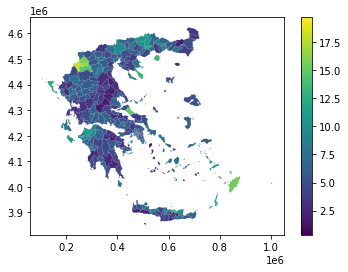

In [135]:
dhmoi.plot("UnemrT01", legend=True)

<AxesSubplot:>

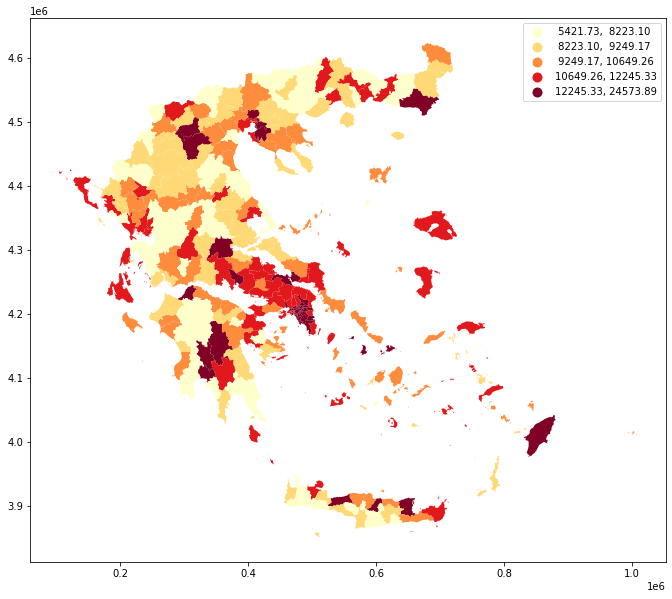

In [136]:
 dhmoi.plot("Income01", scheme='quantiles', cmap='YlOrRd',  legend=True, figsize=(12, 10))

Μπορούμε να οπτικοποιήσουμε διαφορετική στήλη τύπου *geopandas.geoseries.GeoSeries* αφού πρώτα την ορίσουμε με την μέθοδο *set_geometry*.

<AxesSubplot:>

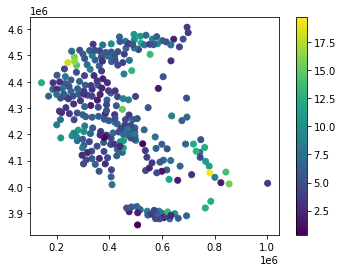

In [137]:
dhmoi = dhmoi.set_geometry("centroid")
dhmoi.plot("UnemrT01", legend=True)

Ορισμός περιμετρικής ζώνης διαμέτρου 20χλμ γύρω από κάθε centroid.

<AxesSubplot:>

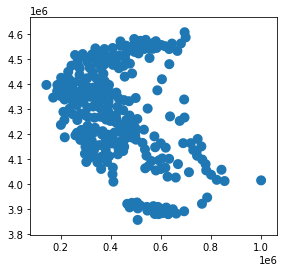

In [138]:
dhmoi = dhmoi.set_geometry("centroid") # ορισμός default γεωμετρίας η στήλη centroid
dhmoi["buffered"] = dhmoi.buffer(20000) #εκτέλεση περιμετρικών ζωνών

dhmoi = dhmoi.set_geometry("buffered") # ορισμός default γεωμετρίας η στήλη buffered
dhmoi.plot(legend=True) # οπτικοποίηση


Ξανα ορίζουμε σαν προκαθορισμένη στήλη γεωμετρία την στήλη *geometry*.

In [139]:
dhmoi = dhmoi.set_geometry("geometry")

Μπορούμε να φιλτράρουμε γραμμές και στήλες όπως και στην pandas χρησιμοποιώντας το index και το όνομα στήλης:

In [140]:
lesvos = dhmoi.loc["5301", "geometry"]

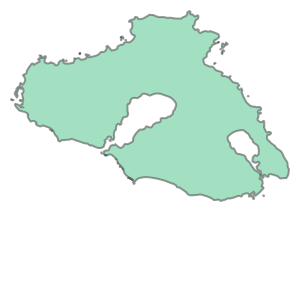

In [141]:
lesvos

In [142]:
type(lesvos)

shapely.geometry.multipolygon.MultiPolygon

Η παραπάνω διαδικασία επιλογής επέστρεψε ένα shapely MultiPolygon object όπως φαίνεται.


Με την μέθοδο *dissolve* μπορούμε να συγχωνεύσουμε γεωμετρικά αντικείμενα βάση κάποιας στήλης. Αντικείμενα με ίδια τιμή θα συγχωνευθούν σε ενιαίο γεωμετρικό αντικείμενο.

In [143]:
dhmoi.head()

,OBJECTID,X,Y,Name,PopM01,PopF01,PopTot01,UnemrM01,UnemrF01,UnemrT01,PrSect01,Foreig01,Income01,Perif,geometry,area,centroid,buffered
CodeELSTAT,,,,,,,,,,,,,,,,,,
0101,1,616259.007833,4.551127e+06,KOMOTINIS,29967.0,31534.0,61501.0,4.726948,6.051873,5.221281,21.817852,1.996780,10969.315256,1,"MULTIPOLYGON (((631058.735 4574912.809, 631431...",6470.182562,POINT (616259.008 4551127.241),"POLYGON ((636259.008 4551127.241, 636162.702 4..."
0102,2,644783.135624,4.561364e+06,ARRIANON,8952.0,9307.0,18259.0,1.955813,2.390181,2.154240,92.912436,0.038337,6398.641486,1,"MULTIPOLYGON (((661976.597 4554253.076, 662118...",7724.393191,POINT (644783.136 4561364.036),"POLYGON ((664783.136 4561364.036, 664686.830 4..."
0103,3,602100.950461,4.555689e+06,IASMOU,7290.0,7561.0,14851.0,5.653884,6.671554,6.062390,70.206767,1.339977,6608.897469,1,"MULTIPOLYGON (((603623.489 4566376.502, 603657...",4870.493148,POINT (602100.950 4555689.138),"POLYGON ((622100.950 4555689.138, 622004.645 4..."
0104,4,633712.468442,4.539548e+06,MARONEIAS - SAPON,8284.0,8342.0,16626.0,5.840957,10.270499,7.421934,57.748085,0.890172,6700.375345,1,"MULTIPOLYGON (((650998.525 4557469.860, 651446...",6441.606153,POINT (633712.468 4539548.490),"POLYGON ((653712.468 4539548.490, 653616.163 4..."
0201,5,517831.195188,4.572544e+06,DRAMAS,28041.0,29326.0,57367.0,8.831689,14.176926,10.851115,7.298838,2.961633,11299.106498,2,"MULTIPOLYGON (((521986.700 4601855.354, 522271...",8401.321201,POINT (517831.195 4572544.478),"POLYGON ((537831.195 4572544.478, 537734.890 4..."


In [144]:
nomoi = dhmoi.dissolve(by='Perif')

<AxesSubplot:>

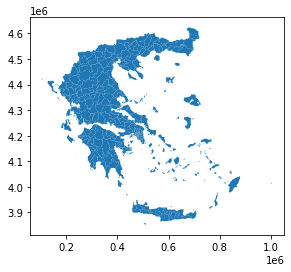

In [145]:
dhmoi.plot()

<AxesSubplot:>

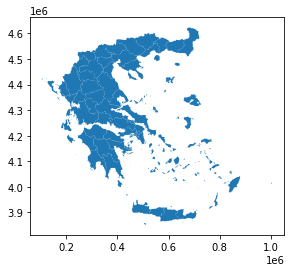

In [146]:
nomoi.plot()

Επιπλεόν κατά την συγχώνευση μπορούμε να εφαρμόσουμε μια συνάρτηση στις αριθμητικές στήλες π.χ. *mean* ή *sum*.

In [147]:
nomoi = dhmoi.dissolve(by='Perif', aggfunc='mean')

<AxesSubplot:>

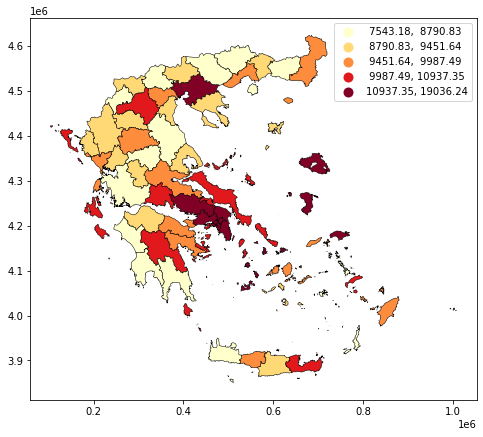

In [148]:
nomoi.plot(column = 'Income01', scheme='quantiles', edgecolor='black',  linewidth=0.5, cmap='YlOrRd',legend=True, figsize=(8, 8))

##  Βιβλιογραφία:

- Kalogirou S., 2020, Local Correlation, Spatial Inequalities, Geographically Weighted Regression and Other Tools (R package)
- GeoPandas, https://geopandas.org/, Πρόσβαση: 29/05/2022
- Prapas I., Analyze Geospatial Data in Python: GeoPandas and Shapely, https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/, Πρόσβαση: 29/05/2022
- Dorman M., 2022, VECTOR LAYERS, Geometries (shapely), https://geobgu.xyz/py/shapely.html, Πρόσβαση: 29/05/2022
- Wasser, Leah, Korinek, Nathan, & Palomino, Jenny. (2021). earthlab/earth-analytics-intermediate-earth-data-science-textbook: one more license fix (1.0.4) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.5571001